In [2]:
import pandas as pd

In [3]:
import glob

In [4]:
from bin.consol.utils import load_dataset
# import bin

aime24df = load_dataset('aime24')

/Users/2katz/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
def get_model_problem_summary(globpath, n=40):
    assert n <= 40
    df = pd.concat([pd.read_csv(filepath, index_col=0).head(n).assign(id=int(filepath.split("/")[-1].split('.')[0])) for filepath in sorted(glob.glob(globpath))]).reset_index(drop=True)
    df2 = aime24df.target.to_frame()
    df2['answer'] = df.groupby('id').answer.agg(lambda x: x.value_counts().index[0])
    df2['trials'] = df.groupby('id').token_usage.count()
    df2['token_usage'] = df.groupby('id').token_usage.sum()
    return df2

def get_model_summary(df):
    return pd.Series({
        "mean_token_usage": df.token_usage.mean(),
        "estimated_price": df.token_usage.sum() * 4.40 / 1e6,
        "accuracy": (df.target == df.answer).mean(),
    })

# get_model_summary(get_model_problem_summary("resources/gpt4o-aime24-ac/*"))

In [8]:
pd.read_csv("./resources/o3minihigh-aime24-sprt/0.csv", index_col=0)

,answer,token_usage
0,33.0,2578
1,33.0,1748
2,33.0,2068
3,33.0,1426
4,33.0,1490
5,33.0,1432
6,33.0,1364
7,33.0,1237
8,33.0,1492
9,33.0,1554


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")


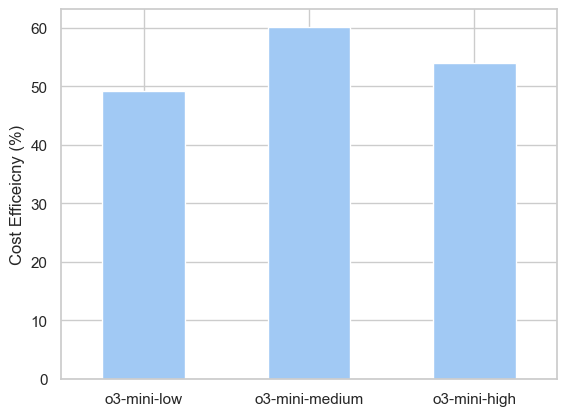

In [10]:
ax = (100 - 100*pd.Series([
    get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-pvalue/*", n=40)).mean_token_usage / get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-vote/*", n=40)).mean_token_usage,
    get_model_summary(get_model_problem_summary("resources/o3minimedium-aime24-pvalue/*", n=40)).mean_token_usage / get_model_summary(get_model_problem_summary("resources/o3minimedium-aime24-vote/*", n=40)).mean_token_usage,
    get_model_summary(get_model_problem_summary("resources/o3minilow-aime24-pvalue/*", n=40)).mean_token_usage / get_model_summary(get_model_problem_summary("resources/o3minilow-aime24-vote/*", n=40)).mean_token_usage,
])[::-1]).to_frame().assign(label=["o3-mini-low", "o3-mini-medium", "o3-mini-high"]).set_index('label').plot.bar(ylabel="Cost Efficeicny (%)", xlabel="", rot=0, legend=False)

plt.savefig("cost_efficiency.pdf", bbox_inches='tight', dpi=300)

In [11]:
(
    get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-sc/*", n=1)),
    get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-sprt/*", n=1)),

    get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-sc/*", n=40)),
    get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-sprt/*", n=40)),
)

ValueError: No objects to concatenate

In [42]:
(
    get_model_summary(get_model_problem_summary("resources/o3minimedium-aime24-sc/*", n=1)),
    get_model_summary(get_model_problem_summary("resources/o3minimedium-aime24-sprt/*", n=1)),

    get_model_summary(get_model_problem_summary("resources/o3minimedium-aime24-sc/*", n=40)),
    get_model_summary(get_model_problem_summary("resources/o3minimedium-aime24-sprt/*", n=40)),
)

(mean_token_usage    5925.533333
 estimated_price        0.782170
 accuracy               0.733333
 dtype: float64,
 mean_token_usage    5226.133333
 estimated_price        0.689850
 accuracy               0.733333
 dtype: float64,
 mean_token_usage    199685.566667
 estimated_price         26.358495
 accuracy                 0.900000
 dtype: float64,
 mean_token_usage    146801.366667
 estimated_price         19.377780
 accuracy                 0.900000
 dtype: float64)

In [13]:
(
    get_model_summary(get_model_problem_summary("resources/o3minilow-aime24-sprt/*", n=1)),
    get_model_summary(get_model_problem_summary("resources/o3minilow-aime24-sprt/*", n=40)),
)

(mean_token_usage    1592.200000
 estimated_price        0.210170
 accuracy               0.566667
 dtype: float64,
 mean_token_usage    53973.700000
 estimated_price         7.124528
 accuracy                0.700000
 dtype: float64)

ValueError: No objects to concatenate

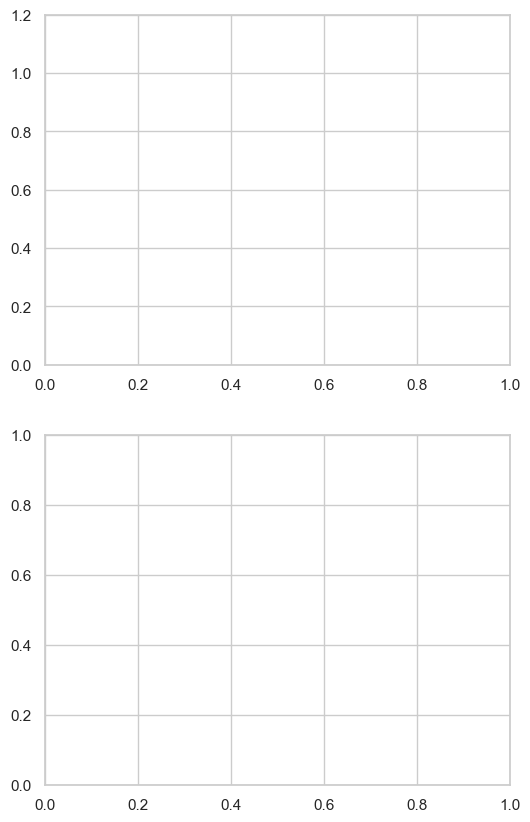

In [14]:
fig, axes = plt.subplots(2,1, figsize=(6, 10))
axes[0].set_ylim(0,1.2)

sns.barplot(
    data=pd.concat([
        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-sc/*", n=1)),
        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-ac/*", n=1)),

        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-sc/*", n=5)),
        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-ac/*", n=5)),

        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-sc/*", n=10)),
        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-ac/*", n=10)),

        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-sc/*", n=20)),
        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-ac/*", n=20)),

        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-sc/*", n=40)),
        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-ac/*", n=40)),
    ], axis=1).T.assign(max_trials=[1,1,5,5,10,10,20,20,40,40], hue=["Self-Consistency", "Ours"]*5),
    x="max_trials",
    y="accuracy",
    hue="hue",
    ax=axes[0],
)


sns.barplot(
    data=pd.concat([
        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-sc/*", n=1)),
        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-ac/*", n=1)),

        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-sc/*", n=5)),
        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-ac/*", n=5)),

        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-sc/*", n=10)),
        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-ac/*", n=10)),

        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-sc/*", n=20)),
        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-ac/*", n=20)),

        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-sc/*", n=40)),
        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-ac/*", n=40)),
    ], axis=1).T.assign(max_trials=[1,1,5,5,10,10,20,20,40,40], hue=["Self-Consistency", "Ours"]*5),
    x="max_trials",
    y="estimated_price",
    hue="hue",
    ax=axes[1],
)

<Axes: xlabel='max_trials', ylabel='estimated_price'>

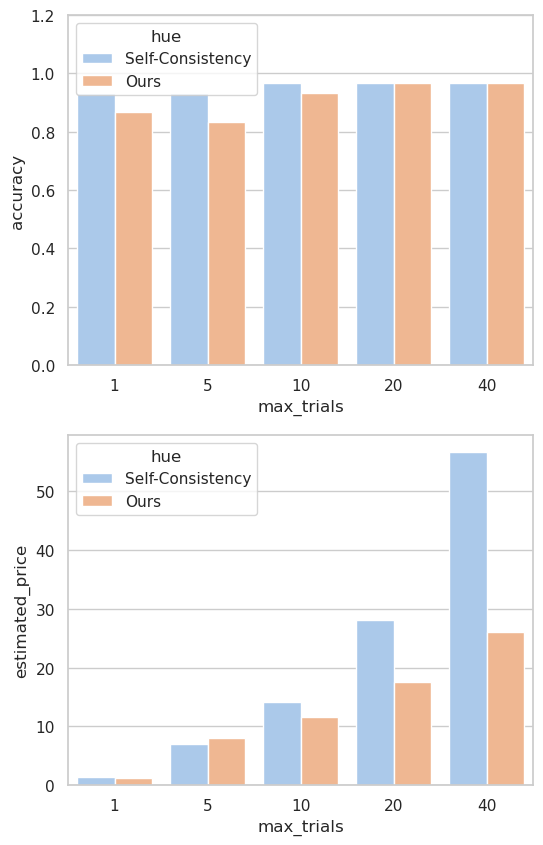

In [12]:
fig, axes = plt.subplots(2,1, figsize=(6, 10))
axes[0].set_ylim(0,1.2)

sns.barplot(
    data=pd.concat([
        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-sc/*", n=1)),
        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-ac/*", n=1)),

        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-sc/*", n=5)),
        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-ac/*", n=5)),

        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-sc/*", n=10)),
        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-ac/*", n=10)),

        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-sc/*", n=20)),
        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-ac/*", n=20)),

        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-sc/*", n=40)),
        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-ac/*", n=40)),
    ], axis=1).T.assign(max_trials=[1,1,5,5,10,10,20,20,40,40], hue=["Self-Consistency", "Ours"]*5),
    x="max_trials",
    y="accuracy",
    hue="hue",
    ax=axes[0],
)


sns.barplot(
    data=pd.concat([
        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-sc/*", n=1)),
        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-ac/*", n=1)),

        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-sc/*", n=5)),
        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-ac/*", n=5)),

        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-sc/*", n=10)),
        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-ac/*", n=10)),

        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-sc/*", n=20)),
        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-ac/*", n=20)),

        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-sc/*", n=40)),
        get_model_summary(get_model_problem_summary("resources/o3minihigh-aime24-ac/*", n=40)),
    ], axis=1).T.assign(max_trials=[1,1,5,5,10,10,20,20,40,40], hue=["Self-Consistency", "Ours"]*5),
    x="max_trials",
    y="estimated_price",
    hue="hue",
    ax=axes[1],
)

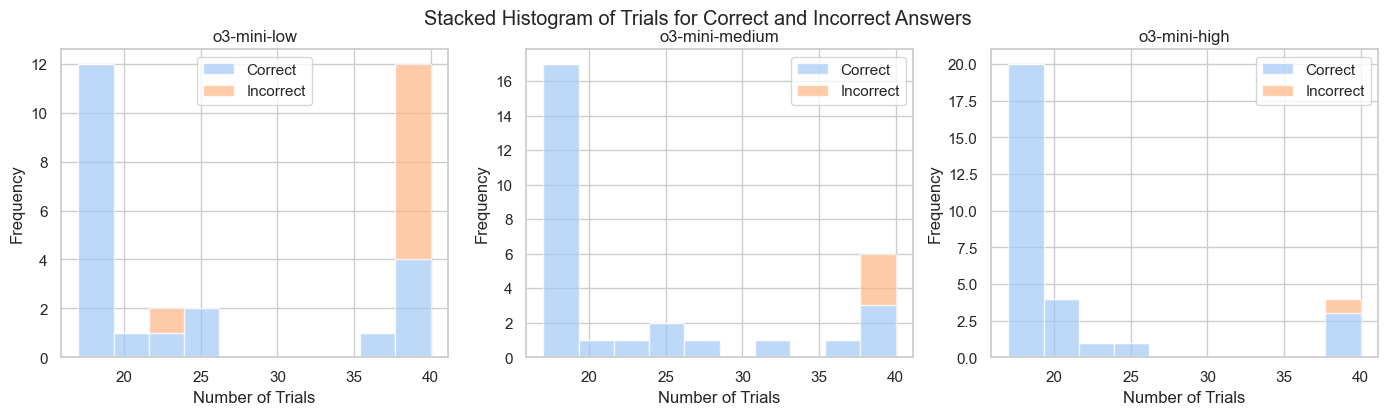

In [16]:
fig, axes = plt.subplots(1, 3, figsize = (17, 4))
fig.suptitle("Stacked Histogram of Trials for Correct and Incorrect Answers")

df = get_model_problem_summary("resources/o3minilow-aime24-sprt/*", n=40)

# Extract trials for correct and incorrect answers
correct_trials = df[df.target == df.answer].trials
incorrect_trials = df[df.target != df.answer].trials

# Plot stacked histogram
axes[0].hist([correct_trials, incorrect_trials], stacked=True, label=["Correct", "Incorrect"], alpha=0.7)

axes[0].set_title("o3-mini-low")
axes[0].set_xlabel("Number of Trials")
axes[0].set_ylabel("Frequency")
axes[0].legend()

df = get_model_problem_summary("resources/o3minimedium-aime24-sprt/*", n=40)

# Extract trials for correct and incorrect answers
correct_trials = df[df.target == df.answer].trials
incorrect_trials = df[df.target != df.answer].trials

# Plot stacked histogram
axes[1].hist([correct_trials, incorrect_trials], stacked=True, label=["Correct", "Incorrect"], alpha=0.7)

axes[1].set_title("o3-mini-medium")
axes[1].set_xlabel("Number of Trials")
axes[1].set_ylabel("Frequency")
axes[1].legend()


df = get_model_problem_summary("resources/o3minihigh-aime24-sprt/*", n=40)

# Extract trials for correct and incorrect answers
correct_trials = df[df.target == df.answer].trials
incorrect_trials = df[df.target != df.answer].trials

# Plot stacked histogram
axes[2].hist([correct_trials, incorrect_trials], stacked=True, label=["Correct", "Incorrect"], alpha=0.7)

axes[2].set_title("o3-mini-high")
axes[2].set_xlabel("Number of Trials")
axes[2].set_ylabel("Frequency")
axes[2].legend()

plt.savefig("stacked_histogram.pdf", bbox_inches='tight', dpi=300)

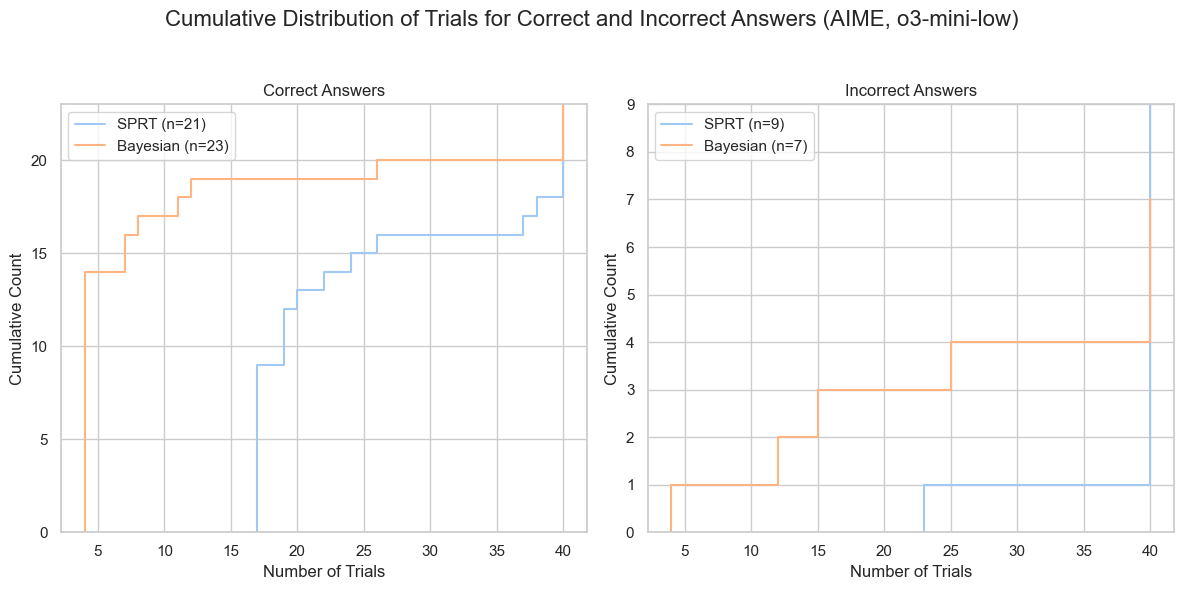

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create two subplots: one for correct answers and one for incorrect answers
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("Cumulative Distribution of Trials for Correct and Incorrect Answers (AIME 2024, o3-mini-low)", fontsize=16)

# Load SPRT data
df_sprt = get_model_problem_summary("resources/o3minilow-aime24-sprt/*", n=40)
# Load Bayesian data (assumes similar folder structure exists)
df_bayes = get_model_problem_summary("resources/o3minilow-aime24-bayesian/*", n=40)

# ------------------
# Correct Answers Plot
# ------------------
sprt_correct = df_sprt[df_sprt.target == df_sprt.answer].trials
bayes_correct = df_bayes[df_bayes.target == df_bayes.answer].trials

# Plot SPRT curve first, then Bayesian
sns.ecdfplot(data=sprt_correct, ax=ax1,
             label=f"SPRT (n={len(sprt_correct)})",
             linestyle="solid", stat="count")
sns.ecdfplot(data=bayes_correct, ax=ax1,
             label=f"Bayesian (n={len(bayes_correct)})",
             linestyle="solid", stat="count")

ax1.set_title("Correct Answers")
ax1.set_xlabel("Number of Trials")
ax1.set_ylabel("Cumulative Count")
ax1.legend()

# --------------------
# Incorrect Answers Plot
# --------------------
sprt_incorrect = df_sprt[df_sprt.target != df_sprt.answer].trials
bayes_incorrect = df_bayes[df_bayes.target != df_bayes.answer].trials

sns.ecdfplot(data=sprt_incorrect, ax=ax2,
             label=f"SPRT (n={len(sprt_incorrect)})",
             linestyle="solid", stat="count")
sns.ecdfplot(data=bayes_incorrect, ax=ax2,
             label=f"Bayesian (n={len(bayes_incorrect)})",
             linestyle="solid", stat="count")

ax2.set_title("Incorrect Answers")
ax2.set_xlabel("Number of Trials")
ax2.set_ylabel("Cumulative Count")
ax2.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("figures/cdist-o3-mini-low-AIME24.pdf", dpi=300, bbox_inches='tight')
plt.show()

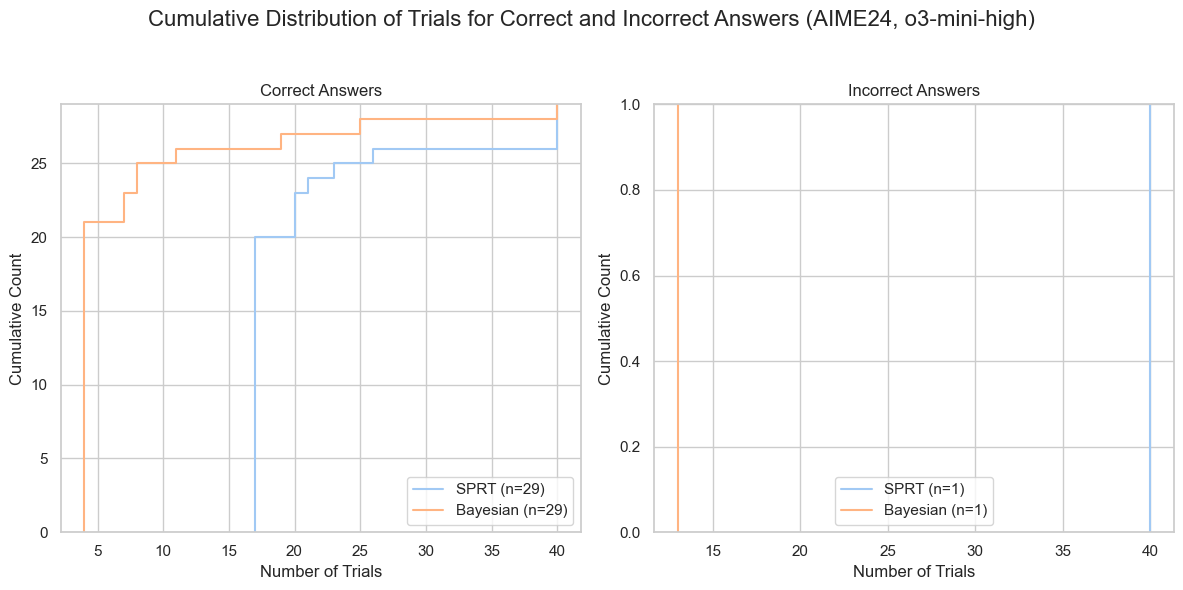

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create two subplots: one for correct answers and one for incorrect answers
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("Cumulative Distribution of Trials for Correct and Incorrect Answers (AIME 2024, o3-mini-high)", fontsize=16)

# Load SPRT data
df_sprt = get_model_problem_summary("resources/o3minihigh-aime24-sprt/*", n=40)
# Load Bayesian data (assumes similar folder structure exists)
df_bayes = get_model_problem_summary("resources/o3minihigh-aime24-bayesian/*", n=40)

# ------------------
# Correct Answers Plot
# ------------------
sprt_correct = df_sprt[df_sprt.target == df_sprt.answer].trials
bayes_correct = df_bayes[df_bayes.target == df_bayes.answer].trials

# Plot SPRT curve first, then Bayesian
sns.ecdfplot(data=sprt_correct, ax=ax1,
             label=f"SPRT (n={len(sprt_correct)})",
             linestyle="solid", stat="count")
sns.ecdfplot(data=bayes_correct, ax=ax1,
             label=f"Bayesian (n={len(bayes_correct)})",
             linestyle="solid", stat="count")

ax1.set_title("Correct Answers")
ax1.set_xlabel("Number of Trials")
ax1.set_ylabel("Cumulative Count")
ax1.legend()

# --------------------
# Incorrect Answers Plot
# --------------------
sprt_incorrect = df_sprt[df_sprt.target != df_sprt.answer].trials
bayes_incorrect = df_bayes[df_bayes.target != df_bayes.answer].trials

sns.ecdfplot(data=sprt_incorrect, ax=ax2,
             label=f"SPRT (n={len(sprt_incorrect)})",
             linestyle="solid", stat="count")
sns.ecdfplot(data=bayes_incorrect, ax=ax2,
             label=f"Bayesian (n={len(bayes_incorrect)})",
             linestyle="solid", stat="count")

ax2.set_title("Incorrect Answers")
ax2.set_xlabel("Number of Trials")
ax2.set_ylabel("Cumulative Count")
ax2.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("figures/cdist-o3-mini-high-AIME24.pdf", dpi=300, bbox_inches='tight')
plt.show()
